In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('test.csv',sep = ';')
pd.set_option('display.max_columns', 500)
df

,USER_ID,ACT_DATE,STATUS,TP_CURRENT,TP_CHANGES_NUM,START_PACK,OFFER_GROUP,BIRTHDAY,GENDER,MLLS_STATE,PORTED_IN,PORTED_OUT,OBLIG_NUM,OBLIG_ON_START,ASSET_TYPE_LAST,DEVICE_TYPE_BUS,USAGE_AREA,REFILL_OCT_16,REFILL_NOV_16,OUTGOING_OCT_16,OUTGOING_NOV_16,GPRS_OCT_16,GPRS_NOV_16,REVENUE_OCT_16,REVENUE_NOV_16
0,24588883,2016-04-19,Q,TP_3GM,0.0,Commercial,Promo,1983-08-26,M,NaN,False,False,NaN,False,NaN,Modem/Router,Regional Cities,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000
1,22709104,2014-11-22,D,TP_XS,0.0,Commercial,Standard,1981-03-19,F,NaN,False,False,NaN,False,NaN,Other,Local Towns,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000
2,608546,2009-04-02,D,TP_FREE,0.0,NaN,NaN,NaN,F,NaN,False,False,NaN,False,NaN,Smartphone,Countryside,150000.0,0.0,59.483333,46.850000,8.0,3.0,8.055,5.855
3,6309892,2011-12-15,D,TP_ANDR,0.0,NaN,NaN,1984-11-28,M,NaN,False,False,NaN,False,Smartphone,Undefined,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000,0.000
4,7556468,2013-06-17,D,TP_DL012,0.0,Commercial,Standard,1992-08-31,F,NaN,False,False,NaN,False,NaN,Smartphone,Minsk,60000.0,90000.0,260.200000,266.066667,4205.0,4727.0,9.810,9.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23478911,2015-07-11,D,TP_MNEW,2.0,Commercial,Promo,1994-04-11,M,Active,True,False,NaN,False,NaN,Smartphone,Mix,70000.0,100000.0,40.016667,68.183333,183.0,1960.0,7.700,7.700
19996,24726776,2016-08-17,F,TP_CRTBL,0.0,Promo,Standard,1994-04-24,F,NaN,False,False,NaN,False,NaN,Tablet,Local Towns,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000
19997,4331543,2011-01-12,R,TP_ANDR,0.0,NaN,NaN,1987-05-12,M,NaN,False,False,NaN,False,Handset,Undefined,Undefined,100000.0,100000.0,NaN,NaN,NaN,NaN,10.000,10.000
19998,22829316,2014-12-25,D,TP_STP,0.0,Commercial,Standard,1987-04-14,M,NaN,False,False,1.0,True,Smartphone,Smartphone,Regional Cities,60000.0,60000.0,320.766667,467.983333,304.0,49.0,6.300,6.790


In [3]:
from datetime import date, datetime


def calculate_age(born):
    today = date(2016,11,1)
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [4]:
import timestring


age = []

for b in df['BIRTHDAY']:
    dt = timestring.Date(b)
    age.append(calculate_age(dt))

usage = []
for b in df['ACT_DATE']:
    dt = timestring.Date(b)
    usage.append(calculate_age(dt))


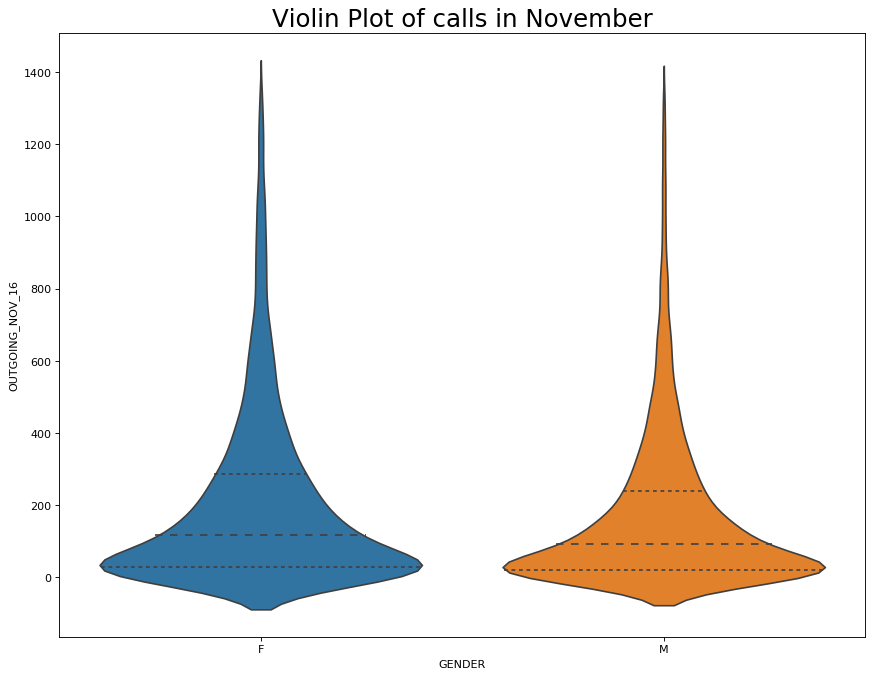

In [5]:
plt.figure(figsize=(13,10), dpi= 80)
df['USAGE']=np.array(usage)
df1 = df[(df['OUTGOING_NOV_16']>0) & (df['OUTGOING_NOV_16']<df['OUTGOING_NOV_16'].mean()*10)]

sns.violinplot(x='GENDER', y='OUTGOING_NOV_16', data=df1, scale='width', inner='quartile')

plt.title('Violin Plot of calls in November', fontsize=22)
plt.show()

As Female violin has more wide top part, we can conclude that women are more active at calling.

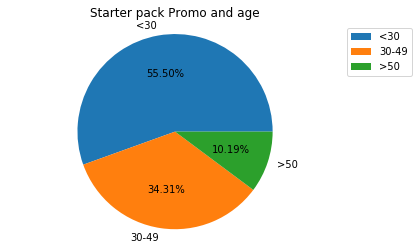

In [6]:
temp = []

for i in range(len(df)):
    if df['START_PACK'][i]=='Promo' and age[i]>0:
        temp.append(age[i])
    
gr1 = []
gr2 = []
gr3 = []

for t in temp:
    if t<30:
        gr1.append(t)
    elif 30<=t<50:
        gr2.append(t)
    elif t>=50:
        gr3.append(t)
        
values = [len(gr1)/len(temp),len(gr2)/len(temp),len(gr3)/len(temp)]
labels = ['<30','30-49','>50']

fig1, ax1 = plt.subplots()
 
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.2f%%')

ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title("Starter pack Promo and age")
plt.show()

This round diagram shows percentage ratio of people having Promo starting Pack of definite age groups. It's easy to notice that this pack is more popular among young people.

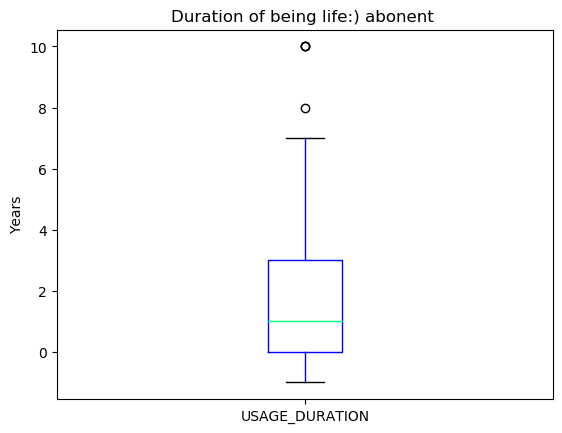

In [7]:
df1=df
df1['USAGE_DURATION'] = pd.Series(usage)

with plt.style.context('default'):
    ax = df1['USAGE_DURATION'].plot(kind='box', subplots=True, cmap='winter')
    plt.title("Duration of being life:) abonent ")
    plt.ylabel("Years")

    

On the average, the duration of being life:) abonent is less than three years.

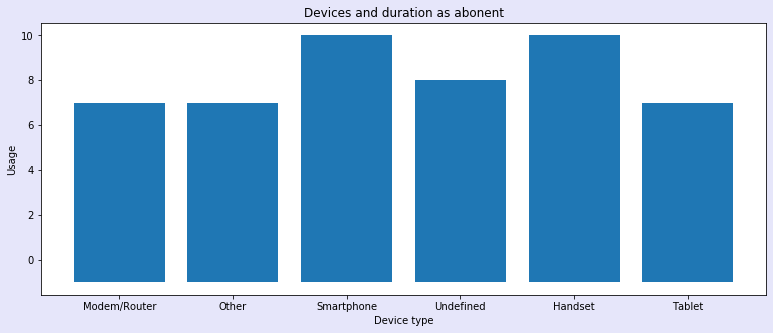

In [8]:
fig, ax = plt.subplots(figsize=(13,5))

ax.bar(df['DEVICE_TYPE_BUS'],usage)
fig.set_facecolor('lavender')
plt.title("Devices and duration as abonent")
plt.xlabel("Device type")
plt.ylabel("Usage")

plt.show()

We can say that the oldest clients prefer smartphones and handsets. 

In [9]:
%pip install timestring

Note: you may need to restart the kernel to use updated packages.


USAGE_AREA
Countryside        0.030710
Local Towns        0.035912
Minsk              0.086898
Mix                0.066411
Regional Cities    0.054334
Undefined          0.022546
Name: PORTED_IN, dtype: float64


Text(0, 0.5, 'Ported in')

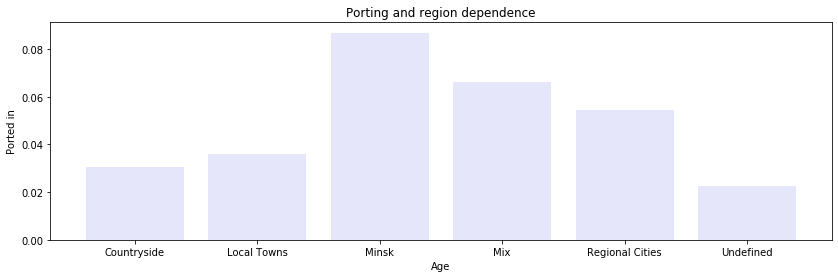

In [10]:
fig, ax = plt.subplots(figsize=(14,4))

print(df.groupby(by = ['USAGE_AREA'])['PORTED_IN'].mean())

p = [0.030710,0.035912,0.086898,0.066411,0.054334,0.022546]
r = ['Countryside', 'Local Towns', 'Minsk', 'Mix', 'Regional Cities', 'Undefined']
plt.bar(r,p,color='lavender')
plt.title("Porting and region dependence")
plt.xlabel("Age")
plt.ylabel("Ported in")


We see that people from Minsk are the most likely to port in.

Text(0.5, 1.0, 'title')

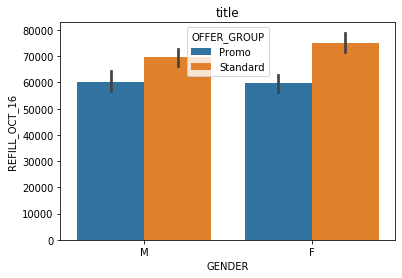

In [11]:
import seaborn as sns


title = "Dependence between offer group and refill in October"
sns.barplot(x="GENDER", hue="OFFER_GROUP", y="REFILL_OCT_16", data=df).set_title("title")

Promo is quiet the same either in Male or Female group, but what about Standart, women prefere it more.

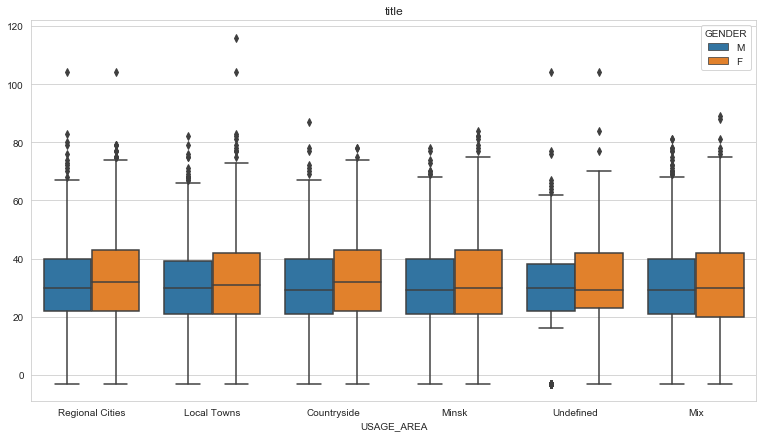

In [12]:
sns.set_style("whitegrid")
title = "Duration of using life:) of different region"
plt.figure(figsize=(13,7))
sns.boxplot(x='USAGE_AREA',y = age,hue = 'GENDER',data = df).set_title("title")
plt.show()

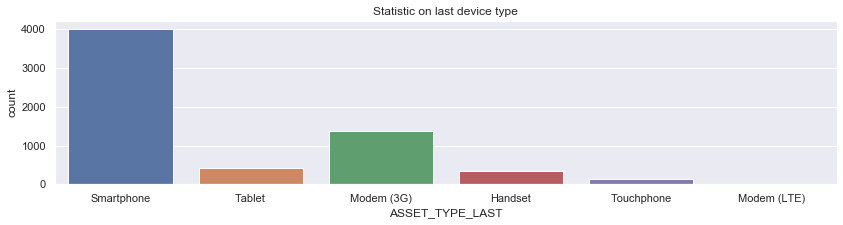

In [13]:
sns.set(style='darkgrid')
title = 'Statistic on last device type'
plt.figure(figsize=(14,3))
sns.countplot(data=df,x='ASSET_TYPE_LAST').set_title(title)
plt.show()

Most of abonents prefered smartphone as last purchase.

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

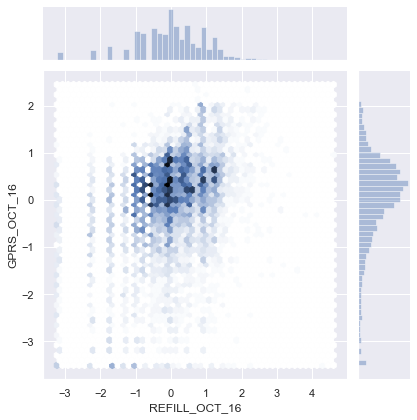

In [14]:
df1=df[(df['REFILL_OCT_16']>0)&(df['GPRS_OCT_16']>0)]
df1['REFILL_OCT_16'] = np.log(df1['REFILL_OCT_16'])
df1['GPRS_OCT_16'] = np.log(df1['GPRS_OCT_16'])
x = df1.loc[:, ['REFILL_OCT_16']]
df1['REFILL_OCT_16'] = (x - x.mean())/x.std()
x = df1.loc[:, ['GPRS_OCT_16']]
df1['GPRS_OCT_16'] = (x - x.mean())/x.std()



ax = sns.jointplot(x='REFILL_OCT_16',y='GPRS_OCT_16',data=df1,kind='hex');
figure_title = 'Distribution of refilling and using Internet in October'




There is distribution of refilling and using Internet in October. The values definitely correlate. The more trafic we use - the more refill.

Text(0.5, 1.0, 'USER ACTIVITY IN NOVEMBER')

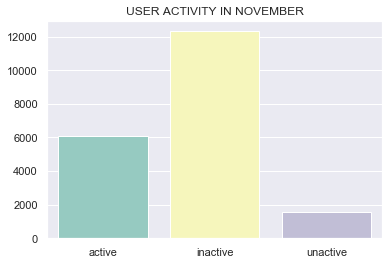

In [15]:
k = 0.7

df1 = df[(df['OUTGOING_NOV_16'].isnull()) & (df['GPRS_NOV_16'].isnull())]
unactive = len(df1)

df2 = df[(df['OUTGOING_NOV_16']<df['OUTGOING_NOV_16'].mean()*k) &
         (df['GPRS_NOV_16'].isnull()<df['GPRS_NOV_16'].mean()*k)]
inactive = len(df2)

active = len(df) - unactive - inactive

sns.set_palette(palette='Set3')
title = "USER ACTIVITY IN NOVEMBER"
sns.barplot(x=['active', 'inactive', 'unactive'], 
            y=[active, inactive, unactive]).set_title(title)

In [16]:
In november most of users were inactive

SyntaxError: invalid syntax (<ipython-input-16-266c25578816>, line 1)

In [30]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


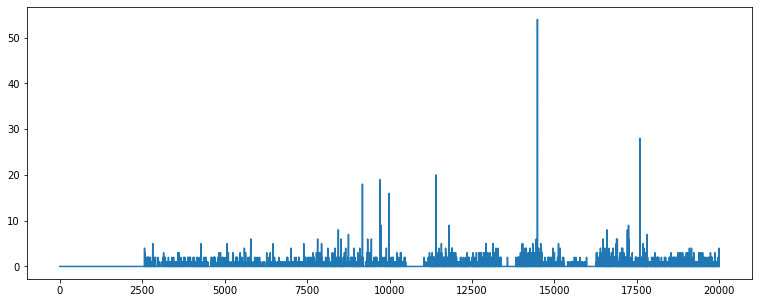

<Figure size 432x288 with 0 Axes>

In [51]:
df1 = df[df['REFILL_OCT_16']>0]
df1['REFILL_OCT_16'] = (x - x.mean())/x.std()
fig, ax = plt.subplots(figsize=(13,5))
fig = plt.figure()

ax.plot(df1.TP_CHANGES_NUM)
#ax.plot(df2.TP_CHANGES_NUM,color = 'purple')
plt.show()